<a href="https://colab.research.google.com/github/croesusking/cse480-notebooks/blob/master/05_2_NFA_to_RE_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports, then Presentation


In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 24.93 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

# Operations on FA
## The Convenience of having Epsilon Transitions
The "just because I feel like it" transition!
## Complementation
Swapping final and non-final states does the trick.
## Concatenation
Juxtapose and add ε-transitions.
## Union
Add ε-transitions from a new initial state to old initial states.
## Use All Three Operations
You should be able to build (by hand) an NFA from the Regular Expression $(01 \cup 0)^*$.
## Intersection
This is akin to the composition of graphs.


## Converting Finite Automata to Regular Expressions
The conversion of a Finite Automaton to a Regular Expression is nicely automated with the Jove tools, but it is also instructive to further study the manual process.

Here is a different than Ganesh's but equivalent take on this process.

The manual conversion begins by creating from the given Deterministic or Nondeterministic Finite Automaton a **Generalized** Nondeterministic Finite Automaton (GNFA) --- defined as an NFA that allows regular expressions to label its transitions, not just alphabet symbols.
The process of converting a Finite Automaton to a GNFA begins by adding a new start state and a new accept state, with ε-transitions from the new start state to the old start state, and from the old accept states to the new accept state. At each stage of the conversion, a state is chosen to delete, hence decreasing the number of states by one. At some point, the number of states will be two --- and those will be the two new states that were added. The label between these two states will be the regular expression that is equivalent to the original NFA.


With $G$ being a GNFA, here is a recursive procedure to convert $G$ to a Regular Expression.

CONVERT($G$):
1. Let $k$ be the number of states of $G$.
2. If $k = 2$, then $G$ must consist of a start state, an accept state, and a single arrow connnecting them labeled with a regular expression $R$. Return the expression $R$.
3. If $k > 2$, select any state $S_{del} \in Q$ different from $S_{start}$ and $S_{accept}$ and let $G^{\prime}$ be the GNFA

$(Q^{\prime}, \Sigma, \delta^{\prime}, S_{start}, S_{accept})$, where

$Q^{\prime} = Q - \{S_{del}\}$ and for any $S_i \in Q^{\prime} - \{S_{accept}\}$ and any $S_j \in Q^{\prime} - \{S_{start}\}$ let

$\delta^{\prime}(S_i, S_j) = (R_1)(R_2)^*(R_3) \cup (R_4)$

for $R_1 = \delta(S_i, S_{del}), R_2 = \delta(S_{del}, S_{del}), R_3 = \delta(S_{del}, S_j)$, and $R_4 = \delta(S_i, S_j)$.

4. Compute CONVERT($G^{\prime}$) and return this value.

### Simple Example
Refer to these two figures:

Before deleting state:
![before-deleting-state.png](attachment:before-deleting-state.png)

After deleting state:
![after-deleting-state.png](attachment:after-deleting-state.png)

Here is the markdown for the example NFA (or is it a DFA?):

In [3]:
fa1 = md2mc('''
       NFA
       I : a -> I
       I : b -> F
       F : a -> F
       F : b -> I
''')

Generating LALR tables


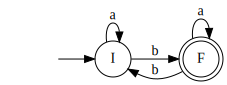

In [4]:
dotObj_nfa(fa1)

After the conversion from an NFA to a GNFA has started by first adding a new start state and a new accept state, the CONVERT procedure can produce several solutions depending on the order the original states are deleted.

For simplicity, just remove them in order (1, 2, 3, etc., where state I is relabeled '1', and state F is relabeled '2'):

$0 \rightarrow 1 (I) \rightarrow 2 (F) \rightarrow 3$

If you call 0 the new start state and 3 the new accept state, then transitions from 0 to 1 and 2 to 3 are labeled with $\epsilon$ (the empty string). Now if you squint your eyes and look at states 0, 1 and 2 as if they were states $S_i$, $S_{del}$ and $S_j$ respectively, as in the above figures, then step 3 of the CONVERT procedure goes like this:

$$R_1 = \epsilon, R_2 = a, R_3 = b, R_4 = \emptyset.$$

So with those substitutions, a new label from state 0 to state 2 is $a^{*}b$, which is just

$$(R_1)(R_2)^{*}(R_3)\ {\cup}\ (R_4).$$

But wait --- we can't totally remove state 1 yet, as it still has transitions going to it!

So if you repeat this procedure with state 2 being **both** state $S_i$ **and** state $S_j$, and state 1 being $S_{del}$, then you get $(ba^{*}b\ {\cup}\ a)$ as the regular expression labeling the transition from state 2 to itself.

(Here $R_1 = b, R_2 = a, R_3 = b, R_4 = a$.)

Finally, using state 0 as $S_i$ and state 3 as $S_j$, and state 2 as $S_{del}$, then you get $a^{*}b(ba^{*}b\ {\cup}\ a)^{*}$ as the single regular expression that results when the procedure ends.

(Here $R_1 = a^{*}b, R_2 = ba^{*}b\ {\cup}\ a, R_3 = \epsilon, R_4 = \emptyset$.)

So, $a^{*}b(ba^{*}b\ {\cup}\ a)^{*}$ is the answer.

## A more "systematized" version
First, show existing transitions as $xy = RE$ using juxtaposed digits $x$ and $y$ to represent the **from** state and the **to** state, and $RE$ the regular expression labeling the transition between them:

|     |   |   |
|-----|---|---|
| 11  | = | a |
| 12  | = | b |
| 21  | = | b |
| 22  | = | a |

   Next, add initial state 0 and new final state 3:
   

|    |   |   |
|----|---|---|
| 01 | = | $\epsilon$  |
| 02 | = | $\emptyset$ |
| 03 | = | $\emptyset$ |
| 23 | = | $\epsilon$  |


Recall that $\epsilon$, representing the empty string, is not the same as $\emptyset$, the empty set. Note that $02$ and $03$ are **empty** (as in empty set, not empty string) transitions. Any transitions not listed (e.g., $13$) are assumed empty, and would be included and labeled as such if we were being meticulous!

Next, remove state 1 and relabel transitions between all the remaining states (0, 2 and 3):

|    |   |   |
|----|---|---|
| 02 | = | $(01)(11)^{*}(12) \cup 02$ | = | $(\epsilon)(a)*(b) \cup \emptyset$ | = | $a^{*}b$ |
| 22 | = | $(21)(11)^{*}(12) \cup 22$ | = | $ba^{*}b \cup a$       |   |     |
| 23 | = | $(21)(11)^{*}(13) \cup 23$ | = | $ba^{*}\emptyset \cup \epsilon$       | = | $\epsilon$   |
| 32 | = | $(31)(11)^{*}(12) \cup 32$ | = | $\emptyset a^{*}b \cup \emptyset$      | = | $\emptyset$   |
| 33 | = | $(31)(11)^{*}(13) \cup 33$ | = | $\emptyset a^{*}a \cup \emptyset$      | = | $\emptyset$   |

Finally, remove state 2 and relabel the transition between the remaining states (0 and 3):

|    |   |   |
|----|---|---|
| 03 | = | $(02)(22)^{*}(23) \cup 03$ | = | $a^{*}b(ba^{*}b \cup a)^{*}\epsilon \cup \emptyset$ | = | $a^{*}b(ba^{*}b \cup a)^{*}$ |


## You Do This Harder Example
This one has one more state than the previous one:

In [5]:
 dfa = '''
    DFA
    IF1 : a|b -> S2
    S2  : a   -> S2
    S2  : b   -> F3
    F3  : a   -> IF1
    F3  : b   -> S2
  '''

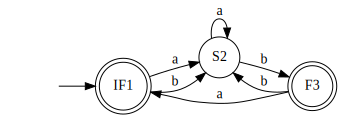

In [6]:
dotObj_dfa(md2mc(dfa))

$\epsilon$ + ((a + b) ((a + bb)\*) ba)\* + ((a + b) ((a + bb)\*) b)


Generating LALR tables


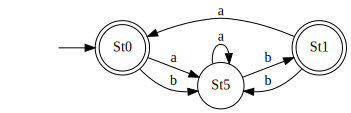

In [8]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("'' + ((a + b)a*b((b + a(a + b))a*b)*('' + a))"))))

In [7]:
help(re2nfa)

Help on function re2nfa in module jove.Def_RE2NFA:

re2nfa(s, stno=0)
    Given a string s representing an RE and an optional
    state number stno (default 0), generate an NFA that
    is language equivalent to the RE



Answer: If you removed states 1, 2, 3 in that order, you should have converted the DFA to the RE: '' + ((a + b)a*b((b + a(a + b))a*b)*('' + a))


# END
